<a href="https://colab.research.google.com/github/Clara56/AI-assignment-/blob/main/%5BAI2025_Assignment%5D_CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR10 Classification

## Import Packages

In [11]:
import sys
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Data Preparation
Use CIFAR10 handwriting dataset

In [12]:
cifar10 = tf.keras.datasets.cifar10

Prepare data for training

In [13]:
# train / test split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# minmax normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

# one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# Compile and Train neural network

## CNN Modeling
Create a convolutional neural network

### Goal

Improve the provided basic CNN model and achieve CIFAR-10 **test accuracy ≥ 75%**.


Modify the network architecture!

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.30),

    tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.35),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(10, activation="softmax")

])



# Compile and Train neural network

In [15]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", factor=0.5, patience=3, verbose=1),
    tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=8),
]
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=10,
    batch_size=64,
    callbacks=callbacks,
    verbose=1

)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.3797 - loss: 1.9986 - val_accuracy: 0.6078 - val_loss: 1.1345 - learning_rate: 0.0010
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.6450 - loss: 1.0097 - val_accuracy: 0.6910 - val_loss: 0.9260 - learning_rate: 0.0010
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.7225 - loss: 0.7932 - val_accuracy: 0.7566 - val_loss: 0.7306 - learning_rate: 0.0010
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.7727 - loss: 0.6513 - val_accuracy: 0.6606 - val_loss: 1.0880 - learning_rate: 0.0010
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.7479 - loss: 0.7374 - val_accuracy: 0.7898 - val_loss: 0.6174 - learning_rate: 0.0010
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8076 - loss: 0.5577 - val_accuracy: 0.7980 - val_loss: 0.6191 - learning_rate: 0.0010
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8404 - l

## Evaluate neural network performance


In [16]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 3s - 9ms/step - accuracy: 0.8127 - loss: 0.5836


[0.583587110042572, 0.8126999735832214]

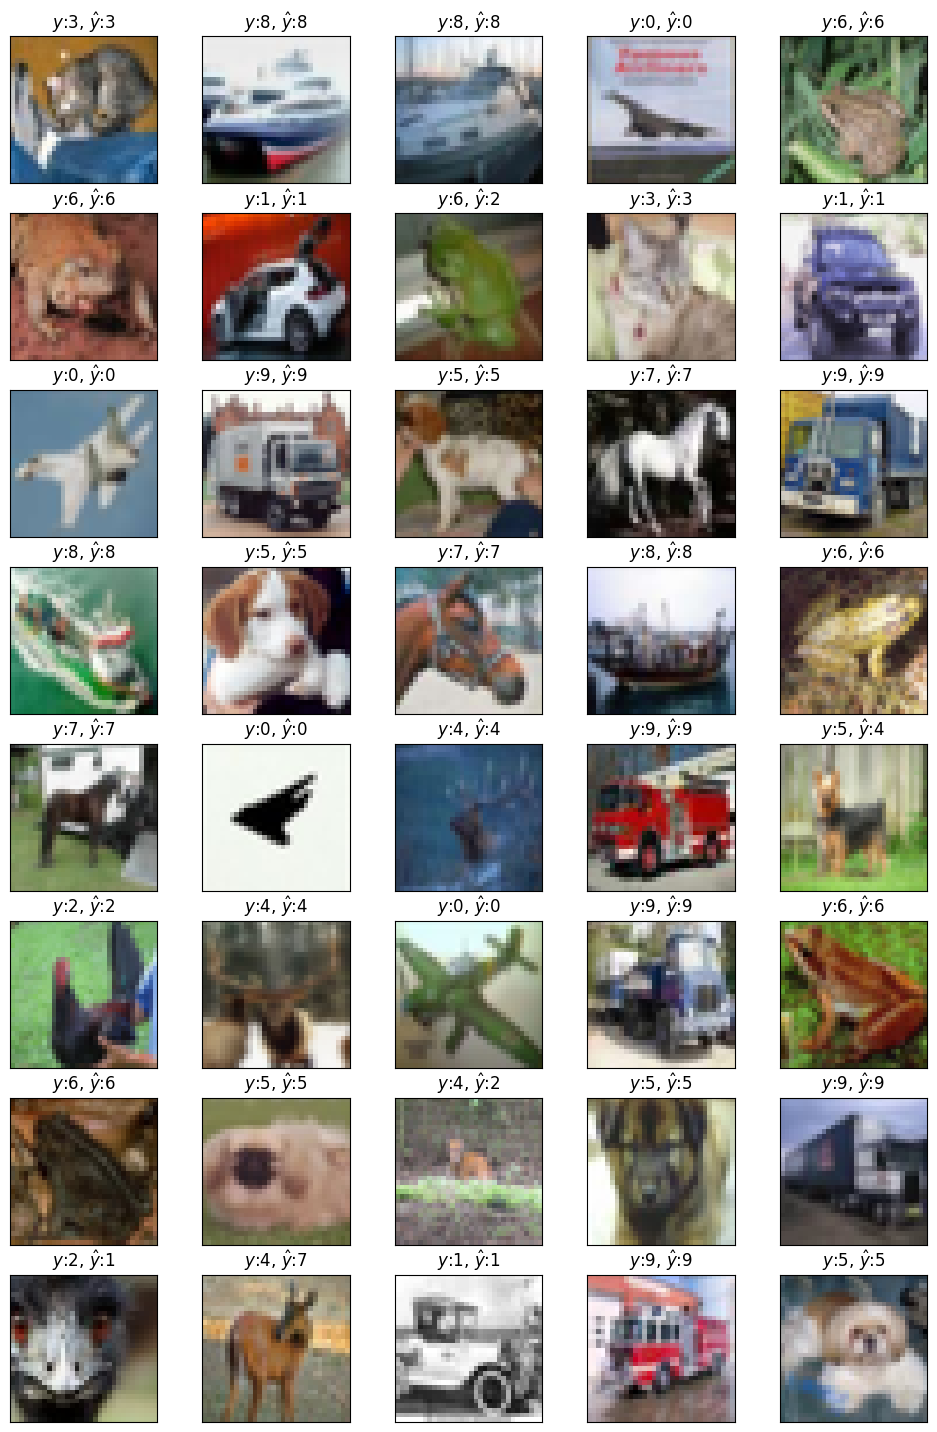

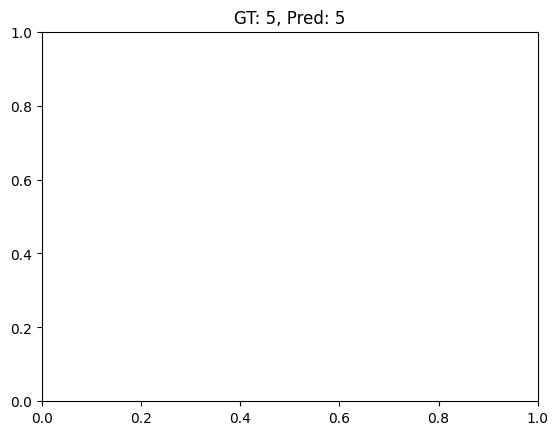

In [17]:
prob = model.predict(x_test[0:40], verbose=0)
pred = tf.argmax(prob, axis=1)

fig = plt.figure(figsize=(12, 18))
for i in range(40):
    subplot = fig.add_subplot(8, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    string = r'$\hat{y}$'
    subplot.set_title(f'$y$:{tf.argmax(y_test[i])}, {string}:{pred[i].numpy()}')
    subplot.imshow(tf.squeeze(x_test[i]))
plt.show()
true_label = tf.argmax(y_test[i]).numpy()
pred_label = pred[i].numpy()
plt.title(f"GT: {true_label}, Pred: {pred_label}")
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

In [18]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.8126999735832214
